> library dependencies

+ itunes API searcher
    + ```$ pip install pyitunes```

In [1]:
import itunes
import pandas as pd 
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request
import numpy as np
import seaborn as sns

### this script implements a wrapper for the [iTunes Search Api](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html)
+ it plots:
    + MIN/MAX values of "Years podcast has published"
    + MIN/MAX values "Minutes of podcast episodes"
    
#### each podcast has a media URL, so the script can be extended for Natural Language Processing of each podcast

In [2]:
# for example
item = itunes.search (query='star wars')
print (item)

[<Feature-Movie>: Star Wars: The Force Awakens, <Feature-Movie>: Star Wars: The Phantom Menace, <Feature-Movie>: Star Wars: The Empire Strikes Back, <Tv-Episode>: R2 Come Home, <Feature-Movie>: Star Wars: Return of the Jedi, <Feature-Movie>: Star Wars: A New Hope, <Feature-Movie>: Star Wars: Attack of the Clones, <Feature-Movie>: Star Wars: Revenge of the Sith, <Podcast>: Rebel Force Radio: Star Wars Podcast, <Tv-Episode>: Bombad Jedi, <Tv-Episode>: An Old Friend, <Tv-Episode>: Weapons Factory, <Tv-Episode>: The Lawless, <Tv-Episode>: Citadel Rescue, <Song>: Star Wars, <Tv-Episode>: Point of No Return, <Tv-Episode>: Bounty, <Tv-Episode>: Ambush, <Tv-Episode>: The Box, <Tv-Episode>: Rising Malevolence, <Tv-Episode>: The Unknown, <Tv-Episode>: Rookies, <Tv-Episode>: Sacrifice, <Tv-Episode>: Defenders of Peace, <Tv-Episode>: Downfall of a Droid, <Tv-Episode>: Conspiracy, <Tv-Episode>: Mystery of the Thousand Moons, <Tv-Episode>: Shadow of Malevolence, <Tv-Episode>: Hostage Crisis]


## This is optimizes to audit podcasts (instead of music albums)
### Un-Comment your query term and Run All Cells
### ⇩


In [3]:
# queryterm = 'cystic fibrosis'
queryterm = 'infectious disease'
# queryterm = 'genetic'
# queryterm = 'covid19'
# queryterm = 'foreclosure'

podsearch = itunes.search(query=queryterm, media='podcast')

In [4]:
for p in podsearch:
    print (p)

<Podcast>: Infectious Diseases Society of America
<Podcast>: Emerging Infectious Diseases
<Podcast>: Persiflagers Infectious Disease Puscast
<Podcast>: Persiflagers Infectious Disease Puscast
<Podcast>: Breakpoints
<Podcast>: Infectious Disease
<Podcast>: The Open Forum Infectious Diseases Podcast
<Podcast>: Infectious Disease & Antibiotic Resistance
<Podcast>: PeerView Infectious Diseases CME/CNE/CPE Audio Podcast
<Podcast>: Infectious Disease Dynamics
<Podcast>: Disease State - Infectious
<Podcast>: PeerVoice Immunology & Infectious Disease Video
<Podcast>: Infectious Questions : An Infectious Diseases Public Health Podcast
<Podcast>: Infectious Diseases
<Podcast>: Podcasts – PKIDs Blog
<Podcast>: Infectious Diseases and Pandemics (video)
<Podcast>: Infectious Diseases and Pandemics (audio)
<Podcast>: PeerVoice Immunology & Infectious Disease Audio
<Podcast>: PeerView Infectious Diseases CME/CNE/CPE Video Podcast
<Podcast>: The History of Infectious Diseases


In [5]:
# each item in that list of Podcast search results looks like this
print (vars(podsearch[0]))

{'id': 519582740, 'name': 'Infectious Diseases Society of America', 'url': 'https://podcasts.apple.com/us/podcast/infectious-diseases-society-of-america/id519582740?uo=4', '_release_date': None, 'artwork': {'30': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts6/v4/97/ac/53/97ac535a-8e19-5a04-df2c-a5713369e99d/mza_158942553313998590.jpg/30x30bb.jpg', '60': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts6/v4/97/ac/53/97ac535a-8e19-5a04-df2c-a5713369e99d/mza_158942553313998590.jpg/60x60bb.jpg', '600': 'https://is3-ssl.mzstatic.com/image/thumb/Podcasts6/v4/97/ac/53/97ac535a-8e19-5a04-df2c-a5713369e99d/mza_158942553313998590.jpg/600x600bb.jpg'}, 'json': {'wrapperType': 'track', 'kind': 'podcast', 'collectionId': 519582740, 'trackId': 519582740, 'artistName': 'IDSA', 'collectionName': 'Infectious Diseases Society of America', 'trackName': 'Infectious Diseases Society of America', 'collectionCensoredName': 'Infectious Diseases Society of America', 'trackCensoredName': 'Infectious Diseas

### ⇪ A little wierd, looks like most of what we want is packed into
### a "JSON" attribute, so...lets' go get it!

- - -

# Lookup 'summary info' about this Podcast Channel

+ name
+ no. of individual episodes / how long been published
+ length posts (minutes)
+ etc.


In [6]:
print (f'{len(podsearch)} channels\n')
for channel in podsearch:
    print (f'{channel.json["trackCount"]} podcasts in "{channel.json["collectionName"]}" (with id = {channel.id})')
    print (f'The last post in this channel was {channel.json["releaseDate"]}, and iTunes page lising all podcast episodes:')
    print (f'{channel.json["collectionViewUrl"]}\n')

20 channels

55 podcasts in "Infectious Diseases Society of America" (with id = 519582740)
The last post in this channel was 2020-05-26T15:59:00Z, and iTunes page lising all podcast episodes:
https://podcasts.apple.com/us/podcast/infectious-diseases-society-of-america/id519582740?uo=4

50 podcasts in "Emerging Infectious Diseases" (with id = 212828612)
The last post in this channel was 2020-05-21T15:56:00Z, and iTunes page lising all podcast episodes:
https://podcasts.apple.com/us/podcast/emerging-infectious-diseases/id212828612?uo=4

300 podcasts in "Persiflagers Infectious Disease Puscast" (with id = 79930757)
The last post in this channel was 2020-05-17T08:25:00Z, and iTunes page lising all podcast episodes:
https://podcasts.apple.com/us/podcast/persiflagers-infectious-disease-puscast/id79930757?uo=4

300 podcasts in "Persiflagers Infectious Disease Puscast" (with id = 1153935086)
The last post in this channel was 2020-05-17T08:25:00Z, and iTunes page lising all podcast episodes:
ht

## 'iTunes Collection Preview' page only lists the first few episodes
### Unfortunately for each channel Apple requires you to hit a button to 'Load More', while the podcast publisher's feed (not by Apple) includes ALL podcasts, so looks like we'll be scraping the FeedURL

In [7]:
channel_number = []
channel_name = []
channel_episodecount = []
channel_itunespreview = []
channel_feed = []

In [8]:
# "feedUrl" is not consistenly present, so handle missing Attributes

# definition to make write podcast channels to an array
def writeKeys(channel):
    channel_number.append(channel.id)
    channel_name.append(channel.json["collectionName"])
    channel_episodecount.append(channel.json["trackCount"])
    channel_itunespreview.append(channel.json["collectionViewUrl"])
    # feedURL is not consistent, check if present
    try:
       channel_feed.append(channel.json["feedUrl"])
    except KeyError as e:
        print (f'{e} does not exist in this channel')
        channel_feed.append(None)

In [9]:
for channel in podsearch:
    writeKeys(channel)
# create an "Channels" dataframe
data = {'ID': channel_number,
        'CHANNEL_NAME': channel_name,
        'EPISODE_COUNT': channel_episodecount,
        'ITUNES_PREVIEW_URL': channel_itunespreview,
        'PUBLISHER_FEED': channel_feed
       }
channels = pd.DataFrame(data,columns=['ID','CHANNEL_NAME','EPISODE_COUNT','ITUNES_PREVIEW_URL','PUBLISHER_FEED'])
channels

'feedUrl' does not exist in this channel
'feedUrl' does not exist in this channel
'feedUrl' does not exist in this channel
'feedUrl' does not exist in this channel


,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED
0,519582740,Infectious Diseases Society of America,55,https://podcasts.apple.com/us/podcast/infectio...,https://idsocietypodcast.libsyn.com/rss
1,212828612,Emerging Infectious Diseases,50,https://podcasts.apple.com/us/podcast/emerging...,https://www2c.cdc.gov/podcasts/createrss.asp?t...
2,79930757,Persiflagers Infectious Disease Puscast,300,https://podcasts.apple.com/us/podcast/persifla...,http://www.pusware.com/podcast.xml
3,1153935086,Persiflagers Infectious Disease Puscast,300,https://podcasts.apple.com/us/podcast/persifla...,http://www.pusware.com/podcast.xml
4,1470308447,Breakpoints,23,https://podcasts.apple.com/us/podcast/breakpoi...,https://pinecast.com/feed/sidp
5,415333788,Infectious Disease,49,https://podcasts.apple.com/us/podcast/infectio...,http://wwwf.imperial.ac.uk/imedia/itunes_colle...
6,1368469324,The Open Forum Infectious Diseases Podcast,28,https://podcasts.apple.com/us/podcast/the-open...,https://feeds.blubrry.com/feeds/the_ofid.xml
7,621579678,Infectious Disease & Antibiotic Resistance,7,https://podcasts.apple.com/us/podcast/infectio...,None
8,275853748,PeerView Infectious Diseases CME/CNE/CPE Audio...,16,https://podcasts.apple.com/us/podcast/peerview...,https://c.peerview.com/podcast/xml/infectiousd...
9,833385368,Infectious Disease Dynamics,53,https://podcasts.apple.com/us/podcast/infectio...,http://rss.sms.cam.ac.uk/rss/collection/153939...


## Next: create an "Episodes" dataframe
### Constructed from each individual podcast episode in the (non-Apple) publisher's Feed

In [10]:
channel_ids = [] # To match back to Channels dataframe
channel_names = [] # For legibility
episode_titles = []  # just cuz
episode_published = [] # to create a MIN/MAX range of 'dates published'
episode_length = []  # to create a MIN/MAX range of 'episode durations'
episode_mediaurls = []  # to get the podcast an convert to text

In [11]:
def getEpisodeList(url):
    #since it's a request from the messy web, let's add some error handling
    try:
        request = urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'})
        source = urllib.request.urlopen(request)
    except urllib.error.HTTPError as e:
        print (f'Failed {e}: {url}')
        return None
    try:
        soup = bs.BeautifulSoup(source,'lxml')
        episodes = soup.find_all('item')
    except AttributeError as e:
        return None
    return episodes

In [12]:
def writeEpisode(row):
    if (row["PUBLISHER_FEED"]!=None):
        # this is where you extract and append the individual Episode keys
        # repeating the Channel ID & Channel Title for each episode
        r = getEpisodeList(row["PUBLISHER_FEED"])
        for x in r:
            episode_titles.append(x.text)
            channel_ids.append(row["ID"])
            channel_names.append(row["CHANNEL_NAME"])
            try:
                length = x.find("itunes:duration")
                episode_length.append(length.text)
            except:
                episode_length.append(None)
            try:
                published_on = x.pubdate
                episode_published.append(published_on.text)
            except:
                episode_published.append(None)
channels.apply(writeEpisode, axis = 1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

In [13]:
data = {'ID': channel_ids,
        'CHANNEL_NAME': channel_names,
        'EPISODE_TITLE': episode_titles,
        'EPISODE_TIMECODE': episode_length,
        'EPISODE_PUBLISHED': episode_published
       }
episodes = pd.DataFrame(data, columns =['ID','CHANNEL_NAME','EPISODE_TITLE','EPISODE_TIMECODE','EPISODE_PUBLISHED'])
episodes

,ID,CHANNEL_NAME,EPISODE_TITLE,EPISODE_TIMECODE,EPISODE_PUBLISHED
0,519582740,Infectious Diseases Society of America,\nCoronavirus: Clinical Trials & Registries (M...,25:42,"Tue, 26 May 2020 15:59:40 +0000"
1,519582740,Infectious Diseases Society of America,"\nCoronavirus: Educating ID Learners (May 23, ...",33:47,"Sat, 23 May 2020 07:30:00 +0000"
2,519582740,Infectious Diseases Society of America,\nCoronavirus: Strategies for Safely Reopening...,17:31,"Tue, 19 May 2020 09:00:00 +0000"
3,519582740,Infectious Diseases Society of America,"\nCoronavirus: Secondary Infections (May 16, 2...",20:54,"Sat, 16 May 2020 06:00:00 +0000"
4,519582740,Infectious Diseases Society of America,"\nCoronavirus: The Disparate Impact (May 12, 2...",28:00,"Tue, 12 May 2020 10:00:00 +0000"
...,...,...,...,...,...
1041,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nRoy F. Chemaly, MD, MPH, FIDSA, FACP - Manag...",00:49:11,"Wed, 3 Apr 2019 18:00:00 -0500"
1042,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nRichard S. Finn, MD - Breaking the Paradox: ...",01:15:38,"Fri, 8 Mar 2019 18:00:00 -0500"
1043,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nGregory Piazza, MD, MS - Turning the Tide on...",00:33:46,"Fri, 22 Feb 2019 18:00:00 -0500"
1044,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nMark S. Sulkowski, MD - Addressing the Evolv...",01:23:36,"Mon, 14 Jan 2019 18:00:00 -0500"


In [14]:
# Minutes are in TIMECODE, need to be converted to raw minutes
def totalMinutes(row):
    # A lot of the podcasts are missing durations! (..strange...)
    if not (row is None):
        # if duration does not list hours
        if (len(row.split(':')))==2:
            minutes, seconds = row.split(':')
            total_min = int(minutes)
            return total_min
        # if 'hours' are listed
        elif (len(row.split(':')))==3:
            hours, minutes, seconds = row.split(':')
            total_min = int(hours)*60 + int(minutes)
            return total_min
    else:
        return None

In [15]:
# compute total minutes fron the duration timecodes
episodes["EPISODE_TOTAL_MINUTES"] = episodes["EPISODE_TIMECODE"].apply(totalMinutes)

# get the year from the DATETIME object in each row:
episodes['EPISODE_YEAR'] = pd.to_datetime(episodes["EPISODE_PUBLISHED"], utc=True).dt.to_period('Y')

/home/xavier/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/home/xavier/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [16]:
episodes

,ID,CHANNEL_NAME,EPISODE_TITLE,EPISODE_TIMECODE,EPISODE_PUBLISHED,EPISODE_TOTAL_MINUTES,EPISODE_YEAR
0,519582740,Infectious Diseases Society of America,\nCoronavirus: Clinical Trials & Registries (M...,25:42,"Tue, 26 May 2020 15:59:40 +0000",25.0,2020
1,519582740,Infectious Diseases Society of America,"\nCoronavirus: Educating ID Learners (May 23, ...",33:47,"Sat, 23 May 2020 07:30:00 +0000",33.0,2020
2,519582740,Infectious Diseases Society of America,\nCoronavirus: Strategies for Safely Reopening...,17:31,"Tue, 19 May 2020 09:00:00 +0000",17.0,2020
3,519582740,Infectious Diseases Society of America,"\nCoronavirus: Secondary Infections (May 16, 2...",20:54,"Sat, 16 May 2020 06:00:00 +0000",20.0,2020
4,519582740,Infectious Diseases Society of America,"\nCoronavirus: The Disparate Impact (May 12, 2...",28:00,"Tue, 12 May 2020 10:00:00 +0000",28.0,2020
...,...,...,...,...,...,...,...
1041,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nRoy F. Chemaly, MD, MPH, FIDSA, FACP - Manag...",00:49:11,"Wed, 3 Apr 2019 18:00:00 -0500",49.0,2019
1042,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nRichard S. Finn, MD - Breaking the Paradox: ...",01:15:38,"Fri, 8 Mar 2019 18:00:00 -0500",75.0,2019
1043,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nGregory Piazza, MD, MS - Turning the Tide on...",00:33:46,"Fri, 22 Feb 2019 18:00:00 -0500",33.0,2019
1044,288732495,PeerView Infectious Diseases CME/CNE/CPE Video...,"\nMark S. Sulkowski, MD - Addressing the Evolv...",01:23:36,"Mon, 14 Jan 2019 18:00:00 -0500",83.0,2019


In [17]:
# Function to write the MIN / MAX ranges from Episodes dataframe back to the Channel summary dataframe
def defineRanges(dfone,dftwo):
    filtered = dfone[dfone.PUBLISHER_FEED.notnull()]
    dfone["FIRST_YEAR"] = ""
    for f in filtered.ID:
        episode_list = dftwo.loc[dftwo['ID']==f]
        minimum_year = episode_list.EPISODE_YEAR.min().year
        maximum_year = episode_list.EPISODE_YEAR.max().year
        minimum_length = episode_list.EPISODE_TOTAL_MINUTES.min()
        maximum_length = episode_list.EPISODE_TOTAL_MINUTES.max()
#         print(f'For this channel, first year is {minimum_year}. Last year is {maximum_year}')
#         print(f'And the shortest podcast is {minimum_length} minutes. Longest podcast is {maximum_length} minutes\n')
        dfone.loc[dfone["ID"]==f,"FIRST_YEAR"] = minimum_year
        dfone.loc[dfone["ID"]==f,"LAST_YEAR"] = maximum_year 
        dfone.loc[dfone["ID"]==f,"MIN_PODCAST_LENGTH"] = minimum_length     
        dfone.loc[dfone["ID"]==f,"MAX_PODCAST_LENGTH"] = maximum_length        

In [18]:
# Write Publish / Duration ranges back to Channel dataframe
defineRanges(channels, episodes)

# Drop the empty FeedURLs which (will have no data)
channels.dropna(subset = ["PUBLISHER_FEED"], inplace = True)
channels.reset_index(drop=True, inplace=True)
channels

,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED,FIRST_YEAR,LAST_YEAR,MIN_PODCAST_LENGTH,MAX_PODCAST_LENGTH
0,519582740,Infectious Diseases Society of America,55,https://podcasts.apple.com/us/podcast/infectio...,https://idsocietypodcast.libsyn.com/rss,2012,2020.0,2.0,55.0
1,212828612,Emerging Infectious Diseases,50,https://podcasts.apple.com/us/podcast/emerging...,https://www2c.cdc.gov/podcasts/createrss.asp?t...,2018,2020.0,7.0,45.0
2,79930757,Persiflagers Infectious Disease Puscast,300,https://podcasts.apple.com/us/podcast/persifla...,http://www.pusware.com/podcast.xml,2007,2020.0,1.0,44.0
3,1153935086,Persiflagers Infectious Disease Puscast,300,https://podcasts.apple.com/us/podcast/persifla...,http://www.pusware.com/podcast.xml,2007,2020.0,1.0,44.0
4,1470308447,Breakpoints,23,https://podcasts.apple.com/us/podcast/breakpoi...,https://pinecast.com/feed/sidp,2019,2020.0,20.0,84.0
5,415333788,Infectious Disease,49,https://podcasts.apple.com/us/podcast/infectio...,http://wwwf.imperial.ac.uk/imedia/itunes_colle...,2008,2016.0,0.0,73.0
6,1368469324,The Open Forum Infectious Diseases Podcast,28,https://podcasts.apple.com/us/podcast/the-open...,https://feeds.blubrry.com/feeds/the_ofid.xml,2014,2020.0,NaN,NaN
7,275853748,PeerView Infectious Diseases CME/CNE/CPE Audio...,16,https://podcasts.apple.com/us/podcast/peerview...,https://c.peerview.com/podcast/xml/infectiousd...,2018,2020.0,21.0,92.0
8,833385368,Infectious Disease Dynamics,53,https://podcasts.apple.com/us/podcast/infectio...,http://rss.sms.cam.ac.uk/rss/collection/153939...,2013,2014.0,NaN,NaN
9,546659150,Disease State - Infectious,17,https://podcasts.apple.com/us/podcast/disease-...,http://api.delvenetworks.com/rest/organization...,2012,2012.0,1.0,29.0


## Now: Let's plot that
### We'll create a 'Range Plot' to show these two MIN/MAX ranges

In [19]:
# Lot of NaN wierdness in this list of durations...because so many missing 'Durations'
# Let's create an index of the absolute ranges for DURATIONS and YEARS, with no missing values:
MinutesIndex = pd.Index(episodes.EPISODE_TOTAL_MINUTES[np.logical_not(np.isnan(episodes.EPISODE_TOTAL_MINUTES))])

#less funkiness with years
YearsIndex = pd.Index(episodes.EPISODE_YEAR).year

In [20]:
#Create an Index of the years, to plot against
minutesaudit = pd.DataFrame(index=set(MinutesIndex))
yearsaudit = pd.DataFrame(index=set(YearsIndex)).sort_index(ascending = True)
minutesaudit.index.name = "MINUTES_RANGE"
yearsaudit.index.name = "YEARS_RANGE"
minutesaudit

""
MINUTES_RANGE
0.0
1.0
2.0
3.0
4.0
...
75.0
83.0
84.0


In [21]:
yearsaudit

""
YEARS_RANGE
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [22]:
# Write the ranges to the "Years Published" dataframe

for i in range (channels.shape[0]):
    print(i+1)
    print (channels.loc[i].CHANNEL_NAME)
    print (int(channels.loc[i].FIRST_YEAR))
    print (int(channels.loc[i].LAST_YEAR))
    yearsaudit[channels.loc[i].CHANNEL_NAME] = yearsaudit.index.to_series().apply(lambda x: i+1 if x >= int(channels.loc[i].FIRST_YEAR) and x <= int(channels.loc[i].LAST_YEAR) else np.NaN)

1
Infectious Diseases Society of America
2012
2020
2
Emerging Infectious Diseases
2018
2020
3
Persiflagers Infectious Disease Puscast
2007
2020
4
Persiflagers Infectious Disease Puscast
2007
2020
5
Breakpoints
2019
2020
6
Infectious Disease
2008
2016
7
The Open Forum Infectious Diseases Podcast
2014
2020
8
PeerView Infectious Diseases CME/CNE/CPE Audio Podcast
2018
2020
9
Infectious Disease Dynamics
2013
2014
10
Disease State - Infectious
2012
2012
11
PeerVoice Immunology & Infectious Disease Video
2018
2019
12
Infectious Questions : An Infectious Diseases Public Health Podcast
2016
2020
13
Infectious Diseases
2011
2018
14
Podcasts – PKIDs Blog
2011
2012
15
PeerVoice Immunology & Infectious Disease Audio
2018
2019
16
PeerView Infectious Diseases CME/CNE/CPE Video Podcast
2019
2020


In [23]:
ticks = []
names = []
for i in range (channels.shape[0]+1):
    ticks.append(i+1)
for i in range (channels.shape[0]):    
    names.append(channels.loc[i].CHANNEL_NAME)

In [24]:
yearsaudit

,Infectious Diseases Society of America,Emerging Infectious Diseases,Persiflagers Infectious Disease Puscast,Breakpoints,Infectious Disease,The Open Forum Infectious Diseases Podcast,PeerView Infectious Diseases CME/CNE/CPE Audio Podcast,Infectious Disease Dynamics,Disease State - Infectious,PeerVoice Immunology & Infectious Disease Video,Infectious Questions : An Infectious Diseases Public Health Podcast,Infectious Diseases,Podcasts – PKIDs Blog,PeerVoice Immunology & Infectious Disease Audio,PeerView Infectious Diseases CME/CNE/CPE Video Podcast
YEARS_RANGE,,,,,,,,,,,,,,,
2007,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,4,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,4,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,4,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,4,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,14.0,NaN,NaN
2012,1.0,NaN,4,NaN,6.0,NaN,NaN,NaN,10.0,NaN,NaN,13.0,14.0,NaN,NaN
2013,1.0,NaN,4,NaN,6.0,NaN,NaN,9.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN
2014,1.0,NaN,4,NaN,6.0,7.0,NaN,9.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN
2015,1.0,NaN,4,NaN,6.0,7.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN


In [25]:
sns.set(style="dark", rc={"lines.linewidth": 8.0})
# sns.set_context("paper", font_scale=2.0)  
sns.set_context("talk", rc={"font.size":30,"axes.titlesize":8,"axes.labelsize":30,"lines.linewidth": 8.0})

Text(0.5, 0, '')

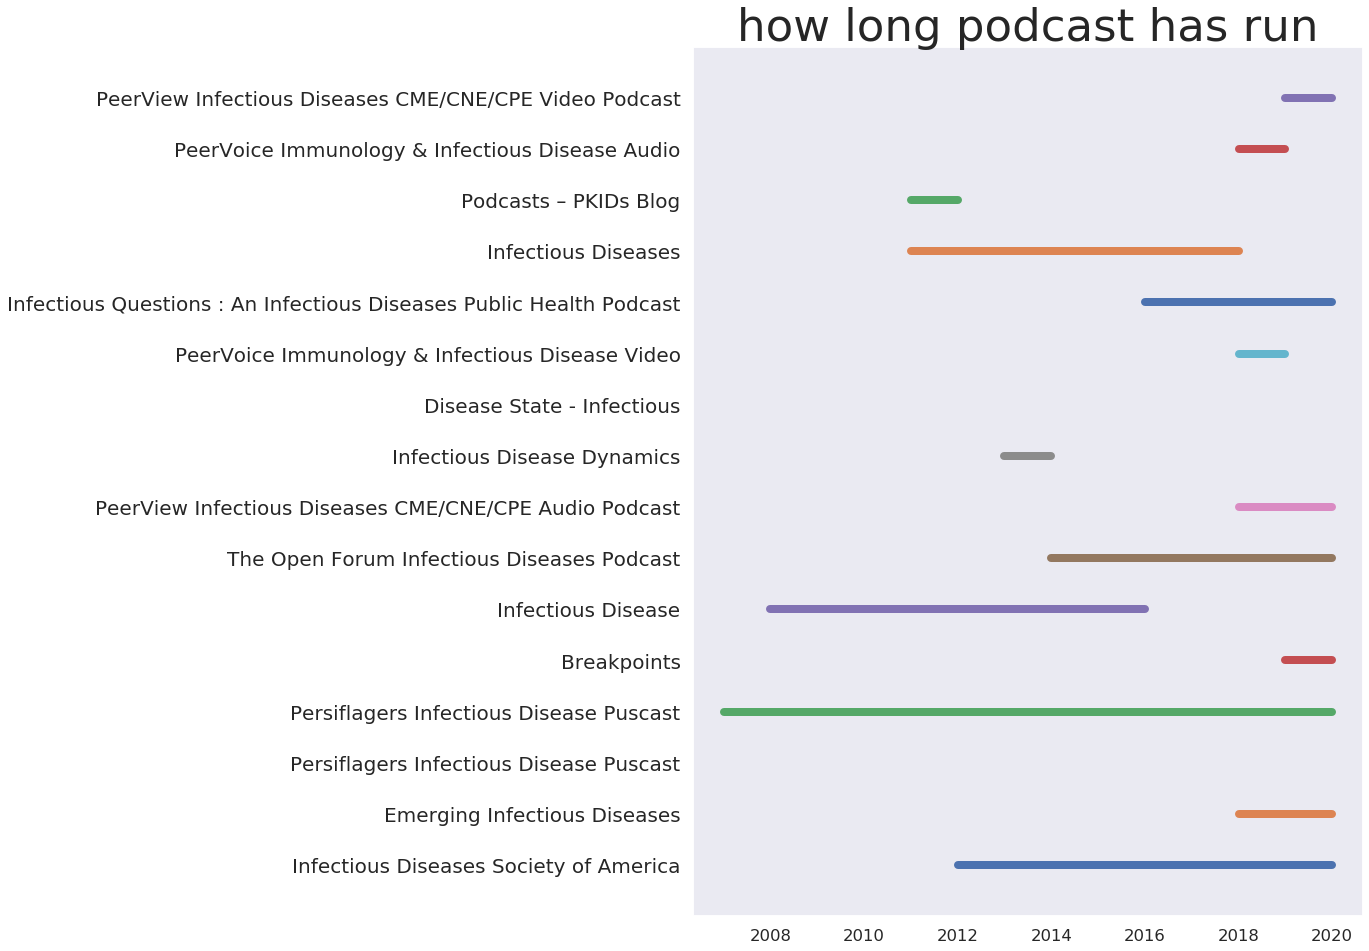

In [26]:
# plot
p = yearsaudit.plot.line(ylim=[0, 4], figsize = (12, 16), legend=False)
p.axes.set_title("how long podcast has run",fontsize = 45)
p.set_yticks(ticks)
p.set_yticklabels(names,fontsize=20)
p.set_xlabel('')